In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import operator
import seaborn as sns

In [43]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
#giving values to different genders(male and female)
data.loc[data['Gender'] == 'Male', 'Gender'] = 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0
# defining variables
features = data['Age'].values
target = data['Purchased'].values
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.3)

In [37]:

#The General Function 
def predict(X, b0, b1):
    return np.array([1 / (1 + np.exp(-1*b0 + -1*b1*x)) for x in X])
# defining my logistic regression model
def logistic_regression(feature_1,target_train):
    b0=np.random.random()
    b1=np.random.random()
    L = 0.0001
    epochs = 1000
    
    for epoch in range(epochs):
        target_predicted = predict(feature_1,b0,b1)
        D_b0 = -2 * sum((target_train - target_predicted) * target_predicted * (1 - target_predicted))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(feature_1 * (target_train - target_predicted) * target_predicted * (1 - target_predicted)) # Derivative of loss wrt b1
       #Here we are upgrading the variable
        b0 = b0 - L*D_b0
        b1 = b1 - L*D_b1
        # b2 = b2 - L*D_b2

    return b0,b1

# %

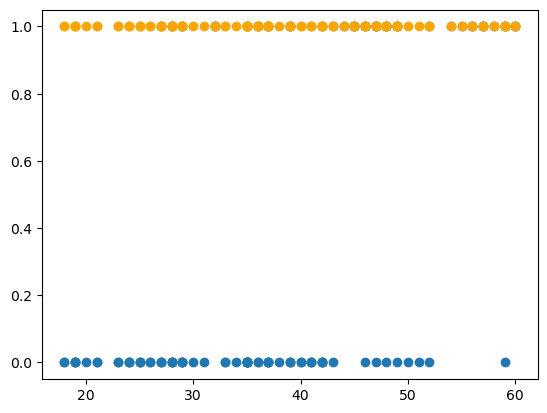

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.40      1.00      0.57        48

    accuracy                           0.40       120
   macro avg       0.20      0.50      0.29       120
weighted avg       0.16      0.40      0.23       120



C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# %%
# using raw data
b0,b1 = logistic_regression(features_train,target_train)
predict_feature = predict(features_test,b0,b1)
predict_feature = [1 if value>=0.5 else 0 for value in predict_feature]
# plotting code
plt.clf()
plt.scatter(features_test, target_test)
plt.scatter(features_test, predict_feature, c="orange")
plt.show()
# check accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test,predict_feature))



In [48]:
def normalize_func(X):
    for i in range(len(X)):
        X[i] = X[i]-np.mean(X)
    return X

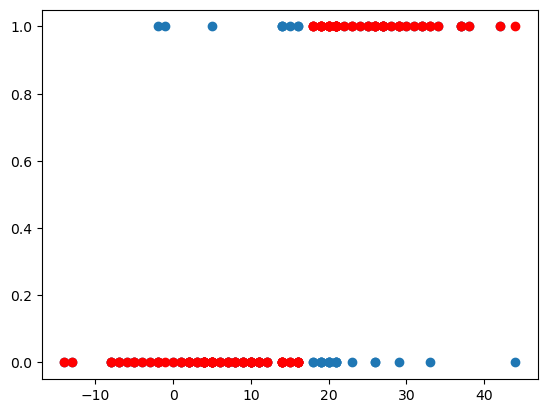

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        81
           1       0.60      0.77      0.67        39

    accuracy                           0.76       120
   macro avg       0.74      0.76      0.74       120
weighted avg       0.78      0.76      0.76       120



In [33]:
# normalizing the data
features_train_norm,features_test_norm = normalize_func(features_train),normalize_func(features_test)
# running our model
b0_norm,b1_norm = logistic_regression(features_train_norm,target_train)
predict_feature_norm = predict(features_test_norm,b0_norm,b1_norm)
predict_feature_norm = [1 if value>=0.5 else 0 for value in predict_feature_norm]
# plotting code
plt.clf()
plt.scatter(features_test_norm, target_test)
plt.scatter(features_test_norm, predict_feature_norm, c="orange")
plt.show()
# check accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test,predict_feature_norm))


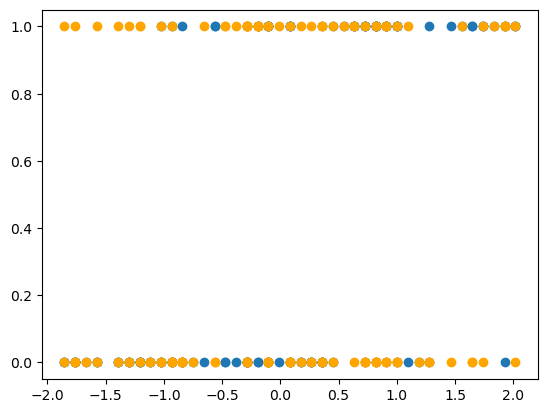

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        72
           1       0.79      0.65      0.71        48

    accuracy                           0.79       120
   macro avg       0.79      0.77      0.77       120
weighted avg       0.79      0.79      0.79       120



In [53]:
# %%
# using standardize data
# standardize helper function
from sklearn.preprocessing import scale
# normalizing the data
features_train_scaled,features_test_scaled = scale(features_train),scale(features_test)
# running our model
b0_scaled,b1_scaled = logistic_regression(features_train_scaled,target_train)
predict_feature_scaled = predict(features_test_scaled,b0_scaled,b1_scaled)
predict_feature_scaled = [1 if value>=0.5 else 0 for value in predict_feature_scaled]
# plotting code
plt.clf()
plt.scatter(features_test_scaled, target_test)
plt.scatter(features_test_scaled, predict_feature_norm, c="orange")
plt.show()
# check accuracy
from sklearn.metrics import classification_report
print(classification_report(target_test,predict_feature_scaled))

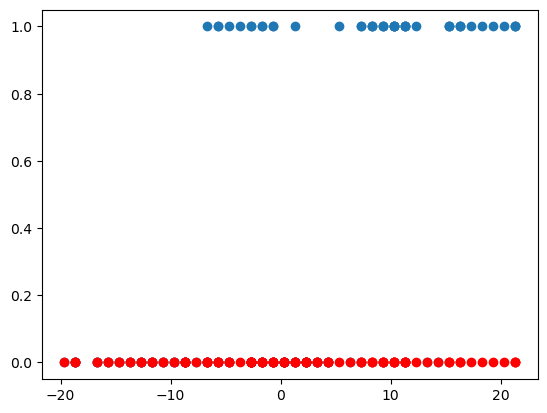

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120



C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# %%
# using sklearn inbuilt functions
# defining in-built functions
from sklearn.linear_model import LogisticRegression
X = data.drop(['Purchased','User ID','Gender','EstimatedSalary'],axis=1)
Y = data['Purchased']
# normalizing data
X_norm = pd.DataFrame(pd.Series(normalize_func([X])))
X_train_norm,X_test_norm,Y_train,Y_test = train_test_split(X_norm[0][0],Y,test_size=0.3)
log_regr_norm = LogisticRegression().fit(X_train_norm,Y_train)
prediction_norm = log_regr.predict(X_test_norm)
# plotting code
plt.clf()
plt.scatter(X_test_norm, Y_test)
plt.scatter(X_test_norm, prediction_norm, c="red")
plt.show()
# check accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_norm))

